In [2]:
import pandas as pd
import statistics as st
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r'') ## Put your path here
df.head()

,title,Metascore,Userscore,Developer,Genres,#players,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review
0,dead by daylight,71.0,6.1,behaviour interactive,"action adventure, survival",online multiplayer,6/14/2018,126,1086,676,False,recommended,out of all the reviews i wrote this one is pro...
1,dead by daylight,71.0,6.1,behaviour interactive,"action adventure, survival",online multiplayer,6/20/2017,85,2139,612,False,recommended,disclaimer i survivor main. i play games for f...
2,dead by daylight,71.0,6.1,behaviour interactive,"action adventure, survival",online multiplayer,12/12/2016,4,55,2694,False,recommended,english after playing for more than two years ...
3,dead by daylight,71.0,6.1,behaviour interactive,"action adventure, survival",online multiplayer,9/17/2017,12,228,48,False,recommended,out of all the reviews i wrote this one is pro...
4,dead by daylight,71.0,6.1,behaviour interactive,"action adventure, survival",online multiplayer,12/24/2018,295,219,71,False,recommended,i have never been told to kill myself more tha...


In [4]:
df['#players'].unique()

array(['online multiplayer', 'no online multiplayer', 'up to 4 ',
       'up to 64 ', nan, 'up to 8 ', 'up to 32 ', 'visual concepts ',
       'up to more than 64 '], dtype=object)

# 1. Sentiment Analysis

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

positive_scores = []
negative_scores = []
neutal_scores = []
compound_scores = []

sid = SentimentIntensityAnalyzer()
for review in df['review']:
    ss = sid.polarity_scores(str(review))
    for k in ss:
        if k == "pos":
            positive_scores.append(ss[k])
        elif k == "neg":
            negative_scores.append(ss[k])
        elif k == "neu":
            neutal_scores.append(ss[k])
        elif k == "compound":
            compound_scores.append(ss[k])
        else:
            continue

In [6]:
# sentiment output
df1 = pd.DataFrame()
df1["Positive scores"] = positive_scores
df1["Negative scores"] = negative_scores
df1["Neutral scores"] = neutal_scores
df1["title"] = df["title"]
df1.head()

,Positive scores,Negative scores,Neutral scores,title
0,0.171,0.151,0.678,dead by daylight
1,0.152,0.145,0.703,dead by daylight
2,0.086,0.112,0.802,dead by daylight
3,0.171,0.151,0.678,dead by daylight
4,0.116,0.265,0.619,dead by daylight


In [8]:
# list all the games included
game_list = []

for game in df['title']:
    if game in game_list:
        continue
    else:
        game_list.append(game)

### average scores for each game (sorted by positive score)

In [10]:
score_each = df1.groupby(['title']).mean()
score_each = score_each.sort_values(by='Positive scores', ascending=False)
score_each['title'] = score_each.index
score_each = score_each.reset_index(drop = True)
score_each.head()

,Positive scores,Negative scores,Neutral scores,title
0,0.462333,0.035000,0.502667,expansion - hearts of iron iv: man the guns
1,0.381494,0.038041,0.580477,human: fall flat
2,0.348435,0.036323,0.607562,slay the spire
3,0.343647,0.045778,0.601516,left 4 dead 2
4,0.339044,0.053084,0.601672,rocket league


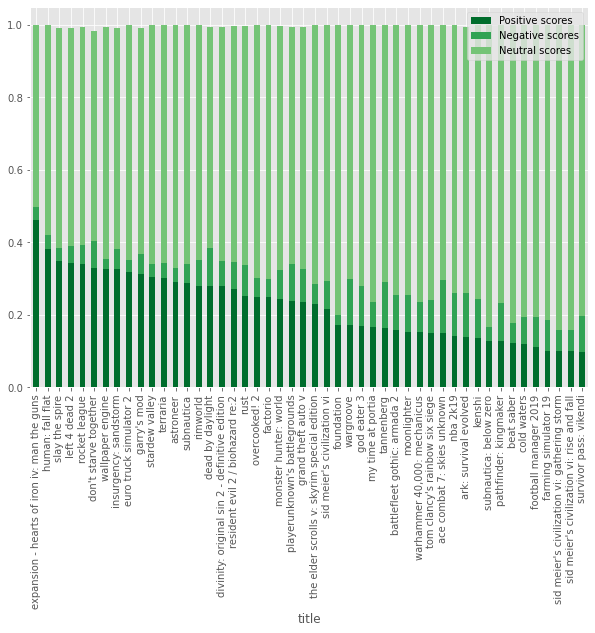

In [11]:
#create a stacked bar plot for all games
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
colors = ["#006D2C", "#31A354","#74C476"]
score_title_index=score_each.set_index('title')
score_title_index.loc[:,['Positive scores','Negative scores','Neutral scores']].plot.bar(stacked=True, color=colors, figsize=(10,7))
plt.legend(loc='upper right')


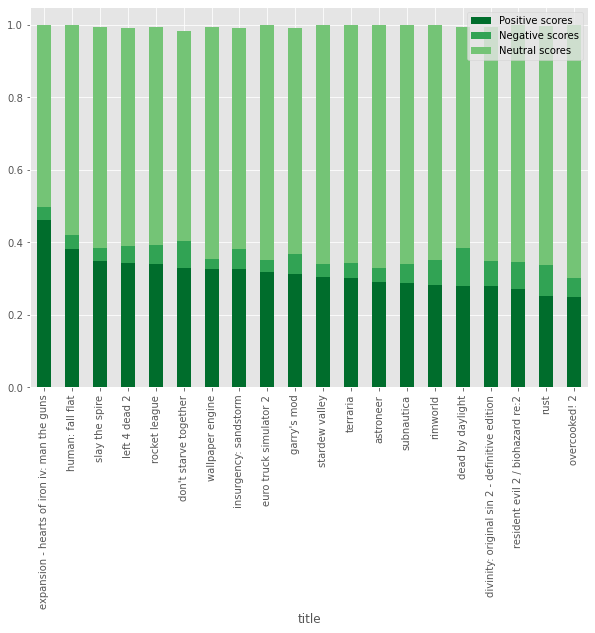

In [12]:
# create a stacked bar plot for 20 games with top positive scores
top_20=score_title_index[0:20]
pal=["#006D2C", "#31A354","#74C476"]
top_20.loc[:,['Positive scores','Negative scores','Neutral scores']].plot.bar(stacked=True, color=pal, figsize=(10,7))
plt.legend(loc='upper right')


In [13]:
# merged with original data (no longer need)
df = df.merge(score_each,how = "right",on = 'title')

### overall average scores

In [14]:
score_general = df1.drop(['title'],axis=1).mean().to_frame()
score_general.head()

,0
Positive scores,0.258204
Negative scores,0.087210
Neutral scores,0.648649


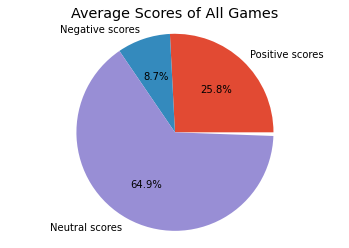

In [15]:
# create a pie chart for average scores of all games
my_data = [0.258139,0.087201,0.648723]
my_labels = 'Positive scores','Negative scores','Neutral scores'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Average Scores of All Games')
plt.axis('equal')
plt.show()

# 2. Topic Modeling

In [16]:
import nltk
from nltk import FreqDist

In [17]:
# set all reviews tp string type
df['review'] = df['review'].astype(str)

In [18]:
tokens = []
# tokenize by review to save time (instead of adding all together)
for r in df['review']:
    t = nltk.word_tokenize(r)
    for i in t:
        tokens.append(i)

In [19]:
# tokenize
# tokens = nltk.word_tokenize(raw)

# change all tokens into lower case and only keep text
words2=[]
for w in tokens:
    w=w.lower()
    if w.isalpha():
        words2.append(w)

### stemming and removing stopword

In [ ]:
#steamming & remove stop words approach

from nltk.corpus import stopwords
#use NLTK stopword
stopwords = stopwords.words('english') 
#keep the words that are not stopword
words_nostopwords = [w for w in words2 if w not in stopwords]
#use stemmer 
porter = nltk.PorterStemmer()
stem1 = [porter.stem(w) for w in words_nostopwords]

#generate a frequency dictionary for all tokens 
freq1 = FreqDist(stem1)

#sort the frequency list in descending order
sorted_freq1 = sorted(freq1.items(),key = lambda k: k[1], reverse = True)
sorted_freq1[:30]

In [ ]:
# plot frequency
freq1.plot(30)

### N-gram NLTK

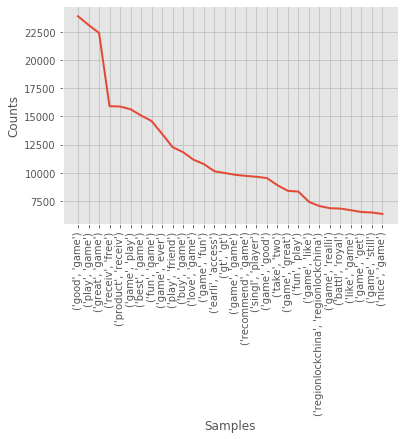

In [19]:
# 2-gram
from nltk.util import ngrams
bigrams=list(ngrams(stem1,2))

#generate a frequency dictionary for all tokens 
freq2 = FreqDist(bigrams)

#sort the frequency list in descending order
sorted_freq2 = sorted(freq2.items(),key = lambda k: k[1], reverse = True)
sorted_freq2[:30]

# plot frequency
freq2.plot(30)

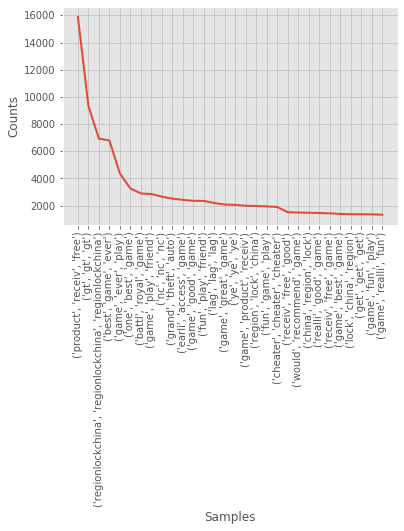

In [20]:
# 3-gram
trigrams=list(ngrams(stem1,3))

#generate a frequency dictionary for all tokens 
freq3 = FreqDist(trigrams)


#sort the frequency list in descending order
sorted_freq3 = sorted(freq3.items(),key = lambda k: k[1], reverse = True)
sorted_freq3[:30]

# plot frequency
freq3.plot(30)

### LDA

In [21]:
import gensim
from gensim import corpora,models
from gensim.models import LdaModel, LsiModel
import warnings
warnings.filterwarnings("ignore")

In [22]:
reviews = df['review'].tolist()

In [23]:
import string

new_reviews = []
for review in reviews: 
    for ch in review:
        if ch in string.punctuation:
            review = review.replace(ch,'') # replace punctuation with nothing
        if ch == '\r':
            review = review.replace(ch,' ') # replace \r with space
    new_reviews.append(review) 

In [24]:
# remove stop words, to lowercase and tokenize
from nltk.corpus import stopwords
mystopwords = stopwords.words('english')

tokens_list = [[word for word in review.lower().split(' ') if word not in mystopwords and word.isalpha()]
         for review in new_reviews]

#remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)

for tokens in tokens_list:
    for token in tokens:
        frequency[token] += 1
        
tokens_list = [[token for token in tokens if frequency[token]>1]
              for tokens in tokens_list]

In [25]:
# generate token dictionary class
dictionary = corpora.Dictionary(tokens_list) 
print(dictionary)

Dictionary(82642 unique tokens: ['actually', 'aka', 'anyone', 'argue', 'baby']...)


In [26]:
# generate a unique token list 
sort_token = sorted(dictionary.items(),key=lambda k:k[0], reverse = False)
unique_token = [token for (ID,token) in sort_token]

In [27]:
# build a corpus
corpus = [dictionary.doc2bow(tokens) for tokens in tokens_list]

In [28]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=10) # fit lda model

lda.print_topics(10)
# how likely a word is going to apppear in a topic

[(0,
  '0.065*"game" + 0.042*"server" + 0.025*"servers" + 0.021*"play" + 0.020*"cant" + 0.015*"even" + 0.013*"get" + 0.012*"fix" + 0.010*"dont" + 0.009*"still"'),
 (1,
  '0.023*"build" + 0.019*"spawn" + 0.016*"building" + 0.015*"world" + 0.014*"rocks" + 0.014*"guns" + 0.013*"survive" + 0.012*"crafting" + 0.012*"kill" + 0.011*"wood"'),
 (2,
  '0.049*"rust" + 0.025*"game" + 0.018*"people" + 0.017*"community" + 0.013*"players" + 0.012*"dont" + 0.011*"base" + 0.010*"make" + 0.008*"toxic" + 0.007*"player"'),
 (3,
  '0.199*"game" + 0.091*"good" + 0.060*"fun" + 0.055*"free" + 0.044*"great" + 0.044*"product" + 0.042*"received" + 0.036*"love" + 0.035*"play" + 0.031*"nice"'),
 (4,
  '0.094*"yes" + 0.086*"better" + 0.056*"animals" + 0.050*"ok" + 0.034*"guess" + 0.033*"yeah" + 0.028*"save" + 0.018*"man" + 0.015*"dude" + 0.013*"nan"'),
 (5,
  '0.052*"u" + 0.040*"pc" + 0.039*"fps" + 0.033*"run" + 0.032*"raid" + 0.022*"graphics" + 0.022*"settings" + 0.019*"computer" + 0.016*"runs" + 0.016*"simulator"

In [29]:
# Generate U Matrix for LDA model
corpus_lda = lda[corpus] #transform lda model

#convert corpus_lda to numpy matrix
U_matrix_lda = gensim.matutils.corpus2dense(corpus_lda,num_terms=10).T
#write U_matrix into pandas dataframe and output
U_matrix_lda_df = pd.DataFrame(U_matrix_lda)
U_matrix_lda_df.to_csv('U_matrix_lda.csv') # importance of a topic in a document (up to 1)

### Word2vec Approach (Similarity between words)

In [30]:
from gensim.models import Word2Vec
# define training data
model = Word2Vec(tokens_list, size=150, min_count=25000)
print(model) # summarize the loaded model
my_vocab = list(model.wv.vocab) # summarize vocabulary
print(my_vocab)

Word2Vec(vocab=35, size=150, alpha=0.025)
['one', 'game', 'like', 'online', 'dont', 'get', 'people', 'games', 'time', 'good', 'play', 'players', 'fun', 'playing', 'im', 'really', 'great', 'even', 'make', 'cant', 'hours', 'much', 'want', 'money', 'still', 'friends', 'new', 'played', 'better', 'would', 'best', 'buy', 'ever', 'love', 'free']


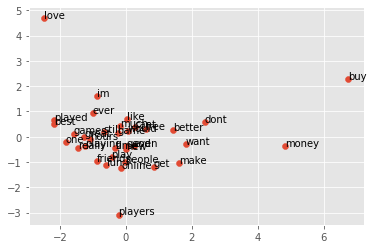

In [31]:
# plot the vectors
from sklearn.decomposition import PCA
from matplotlib import pyplot
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1]) # create a scatter plot of the projection
#annotate plot data points
for i, word in enumerate(my_vocab):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [32]:
# Similarity for a specific word
# model.wv.most_similar('story',topn=10)

### Classification Approach - Predict Recommended / Not Recommended

In [33]:
# add review length as feature
length=[]
for r in df['review']:
    length.append(len(r))
df['review_len'] = length

In [34]:
df['is_early_access_review'] = df['is_early_access_review'].astype(int)

In [35]:
recommend = []
for r in df['recommendation']:
    if r == 'recommended':
        recommend.append(1)
    else:
        recommend.append(0)
df['recommendation'] = recommend

,title,Metascore,Userscore,Developer,Genres,#players,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,Positive scores,Negative scores,Neutral scores,review_len
0,dead by daylight,71.0,6.1,behaviour interactive,"action adventure, survival",online multiplayer,6/14/2018,126,1086,676,0,1,out of all the reviews i wrote this one is pro...,0.279017,0.105878,0.609883,2094
1,dead by daylight,71.0,6.1,behaviour interactive,"action adventure, survival",online multiplayer,6/20/2017,85,2139,612,0,1,disclaimer i survivor main. i play games for f...,0.279017,0.105878,0.609883,1397
2,dead by daylight,71.0,6.1,behaviour interactive,"action adventure, survival",online multiplayer,12/12/2016,4,55,2694,0,1,english after playing for more than two years ...,0.279017,0.105878,0.609883,4868
3,dead by daylight,71.0,6.1,behaviour interactive,"action adventure, survival",online multiplayer,9/17/2017,12,228,48,0,1,out of all the reviews i wrote this one is pro...,0.279017,0.105878,0.609883,2094
4,dead by daylight,71.0,6.1,behaviour interactive,"action adventure, survival",online multiplayer,12/24/2018,295,219,71,0,1,i have never been told to kill myself more tha...,0.279017,0.105878,0.609883,72


In [36]:
df0 = df['#players'].str.get_dummies()

In [37]:
df = pd.concat([df,df0],axis=1)

In [44]:
df = df.drop(['title','Developer','Genres','date_posted'],axis=1)

In [46]:
df = df.drop(['#players'],axis=1)

In [50]:
df["Positive scores"] = positive_scores
df["Negative scores"] = negative_scores
df["Neutral scores"] = neutal_scores

In [ ]:
df = pd.read_csv(r'') ## Put your path here

In [ ]:
def test(data):
    dfData = data.corr(method='spearman')
    plt.subplots(figsize=(9, 9))
    sns.heatmap(dfData, annot=False, vmax=1, vmin=0, square=True, cmap="Blues")
    plt.savefig('./Correalation.png')
    plt.show()